Problem:
Let’s pretend that we are designing a veterinary trial for a vaccine against Hepatitis E for pigs. The
probability to become infected following an exposure is pc = 0.5 for untreated pigs. The developer of the
vaccine believes that this probability is reduced to pv = 0.1 following vaccination. The control and treatment
arms have the same number of pigs, N, and the statistical significance is evaluated via a permutation test.
How should we choose N to ensure that we have approximately 90% chance of seeing a difference between
the control and treatment arms that is significant at α = 0.05 level?
This problem can be solved by a large number of methods. I suggest that you pursue a computational
approach. That is implement classes orfunctions that simulate the outcomes in control and treatment
arms; implement a class or function that performs a permutation test; and determine the probability of a
statistically significant difference at α = 0.05 level for a few values of N. Based on that plot, determine a
suitable value of N that the problem asks for. Then perform simulations at this N and confirm that there is
indeed about 90% chance that the trial passes the statistical test.


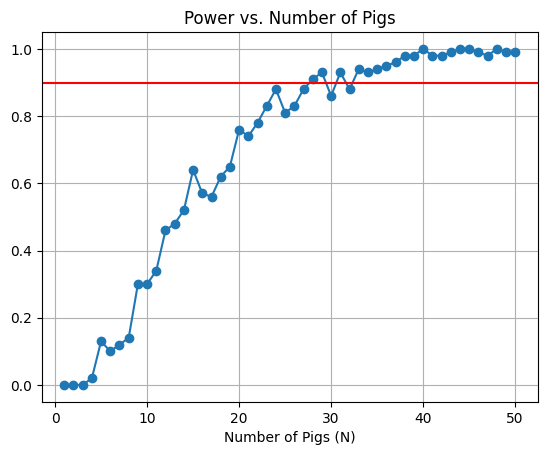

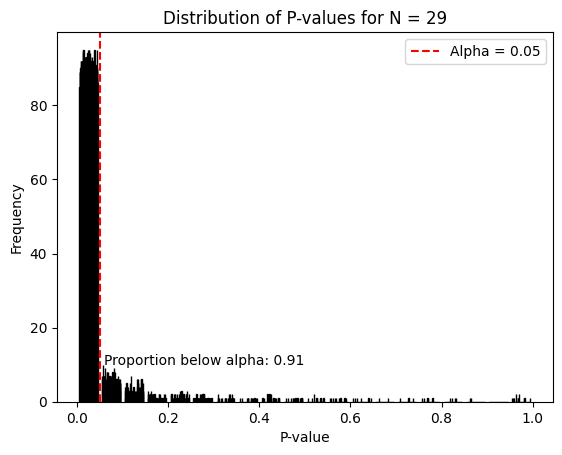

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
# goal of these functions are to simulate a permutation test and calculate the power of the tests with different N values to find the best one that gives us .90 power.

# Function to perform permutation test and return the p-value
def permutation_test(control_sample, treated_sample):
    observed_difference = np.mean(treated_sample) - np.mean(control_sample) # Colculating diffrence on treated and control

    all_together = np.concatenate((control_sample, treated_sample)) # combining the two samples

    number_of_splits = 100  # I ran this as 100 because anything higher took too long to run
    differences = np.zeros(number_of_splits) # Creating an array of zeros to store the differences
    all_copy = all_together.copy() # Copying the combined array

    for i in range(number_of_splits): # Looping through the number of splits
        np.random.shuffle(all_copy)  # Shuffle the entire array
        fake_treated = all_copy[:len(treated_sample)]
        fake_control = all_copy[len(treated_sample):]
        differences[i] = np.mean(fake_treated) - np.mean(fake_control) # Calculating the difference between the fake treated and fake control

    p_value = (np.abs(differences) >= np.abs(observed_difference)).mean()
    return(p_value)

# Function to simulate multiple trials and calculate the power for N pigs
def simulate_trial(N, control_p=0.5, treated_p=0.1, repeats=100):
    outcomes = np.array([0, 1]) # binomal outcomes

    control_sample = np.random.choice(outcomes, size=(repeats, N), p=[control_p, 1 - control_p]) # 1- control_p to calculate probability of failure
    treated_sample = np.random.choice(outcomes, size=(repeats, N), p=[treated_p, 1 - treated_p]) # same here

    p_values = [permutation_test(control_sample[i], treated_sample[i]) for i in range(repeats)]
    power = np.mean(np.array(p_values) <= 0.05)
    return(power, p_values) # going to return both the power and p_values in this function.

# Simulating and plotting the power vs N
N_values = list(range(1, 51)) # For the first plot, trying to see which N gives us the best power for problem given.
powers = []

p_values_N29 = [simulate_trial(29)[1] for _ in range(100)]  # Extracting the p_values for N=30, for the second part to visualize the distribution of p_values for N=30
for N in N_values:
    power, _ = simulate_trial(N) # Calling the simulate_trial function and only grabbing the power
    powers.append(power)

# Plotting the power vs N
plt.plot(N_values, powers, marker='o')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.xlabel("Number of Pigs (N)")
plt.title("Power vs. Number of Pigs")
plt.grid(True)
plt.show()

# Plotting the histogram for N = 29 with the P_value distribution, might be extra but its good confirmation.
plt.hist(p_values_N29, bins=20, edgecolor='black')
plt.axvline(x=0.05, color='r', linestyle='--', label='Alpha = 0.05')
plt.xlabel("P-value")
plt.ylabel("Frequency")
plt.title("Distribution of P-values for N = 29")
plt.legend()
below_alpha = np.array(p_values_N29) <= 0.05 
plt.text(.06, 10, f"Proportion below alpha: {below_alpha.mean():.2f}")  # showing the proportion of p_values below alpha on the graph
plt.show()



Based on the problem given, I decided to create two functions for this. The first function will perform a permutation test based on the treated and control arms, this function is similar to the code given in class. the second function will perform simulations on the permutation tests and will return the P-value and power calculations. My thought proccess is commented in the code above. For my plot Power vs pigs I decided to plot N vlaues 1-50 to with a line at .90 to designate our target area. Which is a 90% of being statistically significant. Based on this I have concluded that a value like N = 29 will consistently give us this target at an alpha of .05. The second plot, Distribution of P-values for N = 29, demostratres this confirmation. I pulled all of the p-values in the simulation from n = 29 and plotted their distribution and calcuated the proportions. The proportion given in this trial is .90, so with a significance level (alpha) of .05, 90% of our simulations are statistically significant.

In [2]:
# This is just looking at the distribution of p_values for N=29 a different way then plotting them. Its kind of the same thing as the histogram but with the powers of N =29, and on a smaller scale.

target_power = 0.90
N_test= 29
num_simulations = 10

for _ in range(num_simulations):
    power, _ = simulate_trial(N_test)
    print(f"Power for N={N_test}: {power:.2f}")

Power for N=29: 0.92
Power for N=29: 0.80
Power for N=29: 0.91
Power for N=29: 0.93
Power for N=29: 0.88
Power for N=29: 0.90
Power for N=29: 0.90
Power for N=29: 0.90
Power for N=29: 0.91
Power for N=29: 0.95
